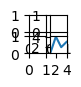

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(0.5, 0.5))
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.show()

In [4]:
from py_wake.examples.data.hornsrev1 import V80
from stable_baselines3 import PPO
from DTUWindGym.envs.WindFarmEnv import FarmEval, AgentEval, PyWakeAgent

import matplotlib.pyplot as plt

c:\Users\manils\AppData\Local\anaconda3\envs\gym\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [5]:
#Here we load in a single eval file.
tester = AgentEval(env=None,model=None, name="PPO Model evaluated") #Create the evaluation object.
tester.load_performance("PPO_eval.nc")   #Load the performance data.

data = tester.multiple_eval_ds  #sets the xarray dataset to a data variable
data.coords, data.data_vars

(Coordinates:
   * ws       (ws) int64 32B 10 11 12 14
   * wd       (wd) int64 40B 260 265 270 275 280
   * turb     (turb) int64 32B 0 1 2 3
   * time     (time) float64 16kB 85.0 86.0 87.0 ... 2.122e+03 2.123e+03
   * TI       (TI) float64 8B 0.07
   * turbbox  (turbbox) <U7 28B 'Default',
 Data variables:
     powerF_a  (time, ws, wd, TI, turbbox) float64 326kB ...
     powerT_a  (time, turb, ws, wd, TI, turbbox) float64 1MB ...
     yaw_a     (time, turb, ws, wd, TI, turbbox) float64 1MB ...
     ws_a      (time, turb, ws, wd, TI, turbbox) float64 1MB ...
     powerF_b  (time, ws, wd, TI, turbbox) float64 326kB ...
     powerT_b  (time, turb, ws, wd, TI, turbbox) float64 1MB ...
     yaw_b     (time, turb, ws, wd, TI, turbbox) float64 1MB ...
     ws_b      (time, turb, ws, wd, TI, turbbox) float64 1MB ...
     reward    (time, ws, wd, TI, turbbox) float64 326kB ...
     pct_inc   (time, ws, wd, TI, turbbox) float64 326kB ...)

In [6]:
TI = 0.07               #TI for the plots
WDS = [260, 270, 280]   #WDs for the plots
WSs = [10, 11, 12]      #WSs for the plots
TURBBOX = "Default"     #Turbulence box for the plots
avg_n = 50              #Number of datapoints for smoothing

#Checks if the proposed ws and wd values are in the data
for ws in WSs:
    if ws not in data.coords["ws"].values:
        print(f"WS {ws} not in data")
        continue
for wd in WDS:
    if wd not in data.coords["wd"].values:
        print(f"WD {wd} not in data")
        continue

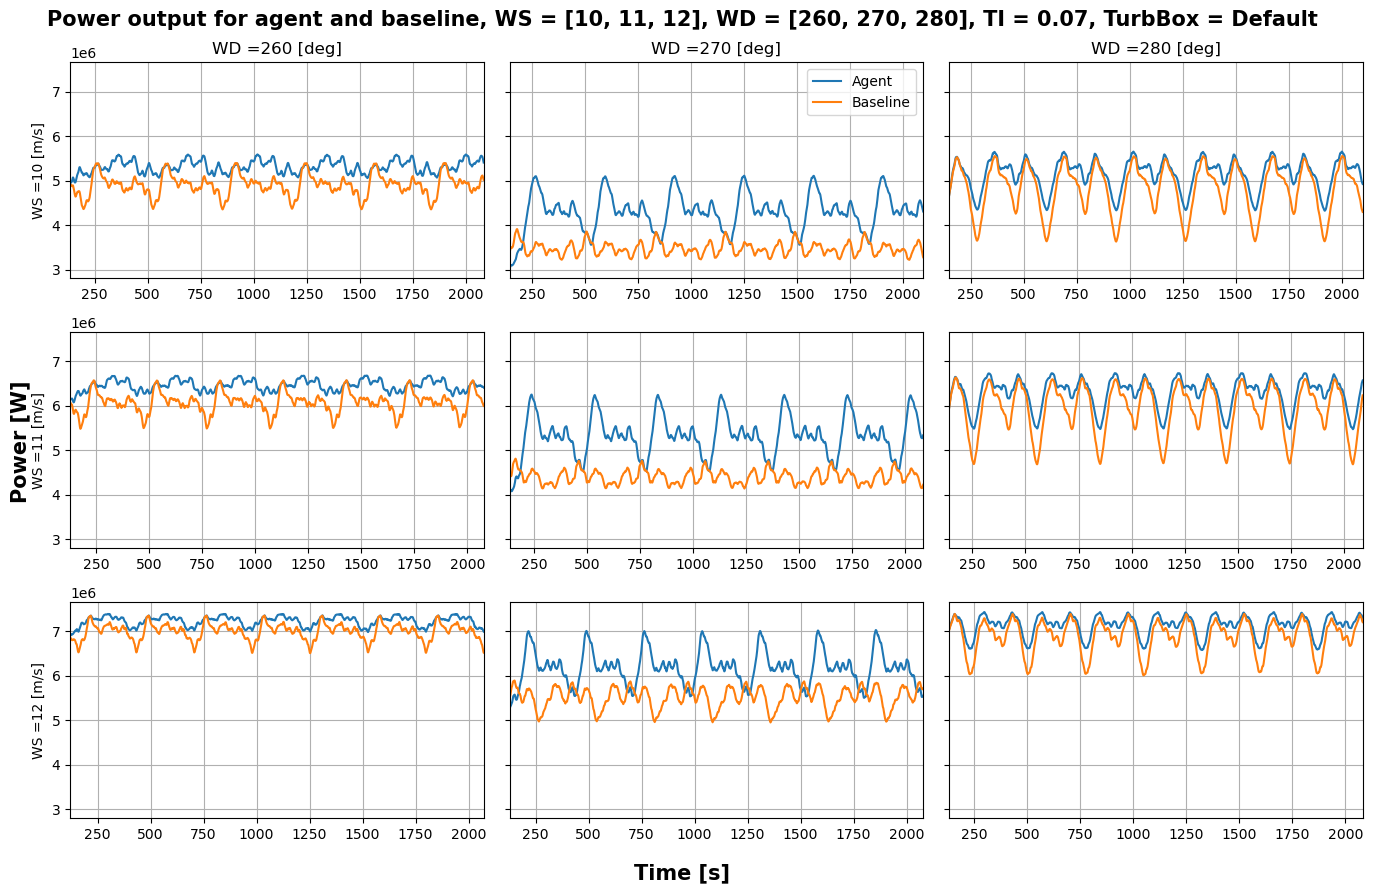

In [7]:
fig, axs = plt.subplots(len(WSs), len(WDS), figsize=(14, 9), sharey=True)
fig, axs = tester.plot_power_farm(WSs, WDS, avg_n=avg_n, TURBBOX=TURBBOX, axs=axs) #Plots the power output of the farm for the given ws, wd, ti and turbbox values.
plt.show() #Shows the plot.